## Importing The Libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading The Data

In [ ]:
# Data Source: https://www.kaggle.com/code/tanmay111/youtube-comments-sentiment-analysis/input

In [ ]:
columns = ['video_id', 'comment_text', 'likes', 'replies']
US_comments = pd.read_csv('/content/drive/MyDrive/datasets/UScomments.csv', encoding="ISO-8859-1", on_bad_lines='skip')
US_comments.head()

,video_id,comment_text,likes,replies,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0,NaN,NaN,NaN
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,NaN,NaN,NaN
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,NaN,NaN,NaN
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,NaN,NaN,NaN
4,XpVt6Z1Gjjo,trending ð,3,0,NaN,NaN,NaN


In [ ]:
US_videos = pd.read_csv("/content/drive/MyDrive/datasets/USvideos.csv", on_bad_lines='skip')
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


,views,likes,dislikes,comment_total
views,1.000000,0.832854,0.541900,0.715559
likes,0.832854,1.000000,0.497287,0.836366
dislikes,0.541900,0.497287,1.000000,0.543974
comment_total,0.715559,0.836366,0.543974,1.000000


<Axes: >

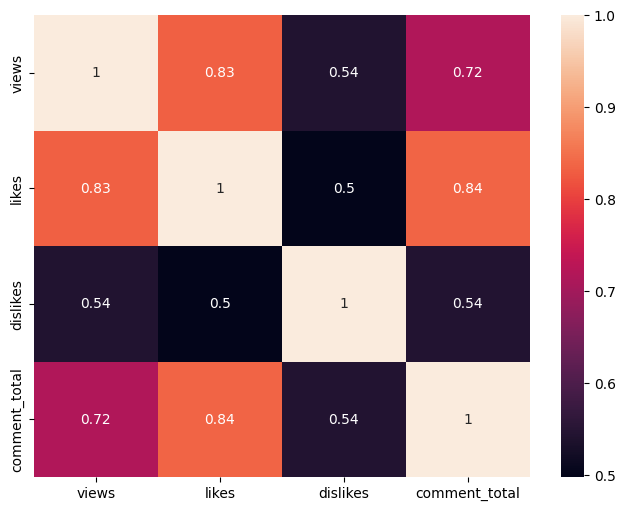

In [ ]:
# Calculates the correlation matrix of the numeric values in our videos dataset.
corrolation_list = ['views', 'likes', 'dislikes', 'comment_total']
hm_data = US_videos[corrolation_list].corr()
display(hm_data)

import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot

# Visual Illustration of the correlation matrix between numeric variables
# Displays how correlated these features are by using a heatmap.

matplotlib.pyplot.figure(figsize=(8,6))
sns.heatmap(hm_data, annot=True)

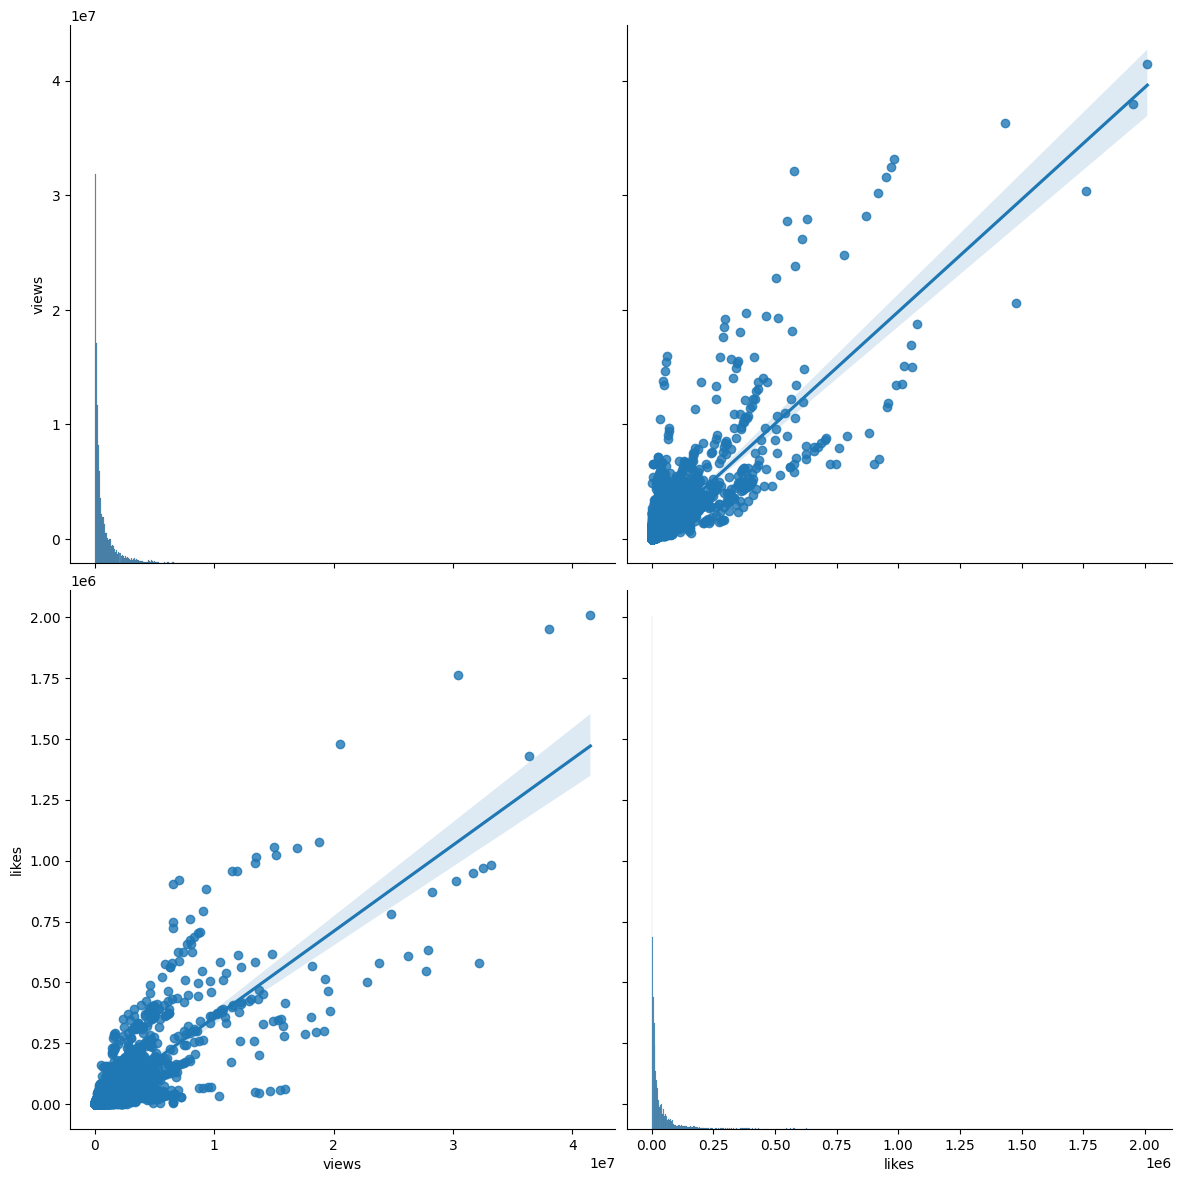

In [ ]:
# View Distribution in 10s of millions
sns.pairplot(US_videos[['views', 'likes']], kind='reg',height=6);

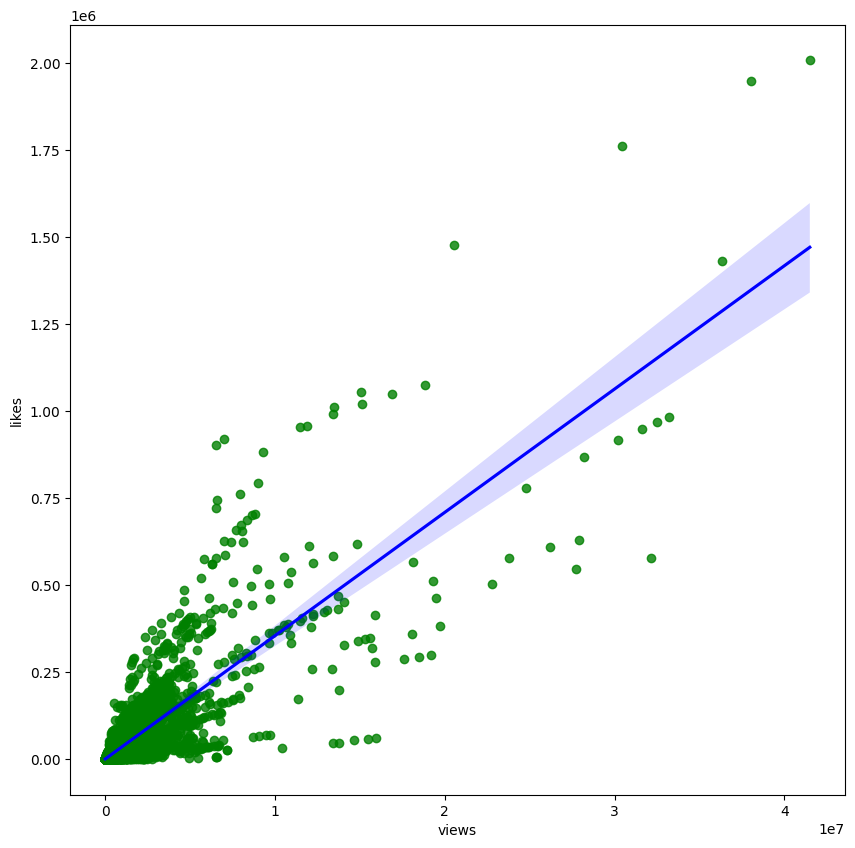

In [ ]:
# the relationship between likes and views only with the added trendline
matplotlib.pyplot.figure(figsize=(10,10))
sns.regplot(x=US_videos['views'], y=US_videos['likes'],scatter_kws={"color": "green"}, line_kws={"color": "blue"});

## Let's do some exploratory data analysis ##

In [ ]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691401 entries, 0 to 691400
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      691401 non-null  object 
 1   comment_text  691376 non-null  object 
 2   likes         691401 non-null  object 
 3   replies       691401 non-null  object 
 4   Unnamed: 4    2 non-null       object 
 5   Unnamed: 5    1 non-null       float64
 6   Unnamed: 6    1 non-null       float64
dtypes: float64(2), object(5)
memory usage: 36.9+ MB


In [ ]:
US_comments.isnull().sum()

video_id             0
comment_text        25
likes                0
replies              0
Unnamed: 4      691399
Unnamed: 5      691400
Unnamed: 6      691400
dtype: int64

In [ ]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7998 non-null   object 
 1   title           7998 non-null   object 
 2   channel_title   7998 non-null   object 
 3   category_id     7998 non-null   int64  
 4   tags            7998 non-null   object 
 5   views           7998 non-null   int64  
 6   likes           7998 non-null   int64  
 7   dislikes        7998 non-null   int64  
 8   comment_total   7998 non-null   int64  
 9   thumbnail_link  7998 non-null   object 
 10  date            7998 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 687.5+ KB


In [ ]:
US_videos.isnull().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

## Data Wrangling and Cleaning

In [ ]:
'''During the exploratory analysis phase we idenfied several rows which seemed to have overlapping entries into unused columns.
We first attempted to identify and drop the defective rows individually based on thier index values.
Our finaly approach attemps to solve this issue by iterating over each row and marking the problematic entries before deleting them.'''

#Identify if a record contains an NaN entry in an unused columns. Anything other than NaN in this unused column is indicative of amisaligned entry.

pd.isnull(US_comments['Unnamed: 4'][0])

True

In [ ]:
# Marking defective rows
indices = []

for index, row in US_comments.iterrows():
    if pd.isnull(US_comments['Unnamed: 4'][index]) == False:
        print("Error detected in line number {}".format(index))
        indices.append(index)


Error detected in line number 245210
Error detected in line number 388422


In [ ]:
# Dropping Marked Index

for i in indices:
    US_comments.drop(i, inplace=True)
    print("Dropped index {}".format(i))

Dropped index 245210
Dropped index 388422


In [ ]:
# With the faulty entries removed, we have no more use for the unamed columns.

US_comments = pd.DataFrame(US_comments, columns=columns)
US_comments.dropna(inplace=True)
US_comments = US_comments.reset_index().drop('index',axis=1)

In [ ]:
# Making sure the like and replies columns are respesented as integers and can be made subject to data aggregation functions.

US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [ ]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ð,3,0


## Removing Punctuations, Numbers and Special Characters.

In [ ]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words.

In [ ]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Changing the text to lower case.

In [ ]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


## Tokenization

In [ ]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wnl = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])
tokenized_tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [ ]:
US_comments['comment_text'] = tokenized_tweet

## Let's do the Sentiment Analysis on the US Comments Dataset

In [ ]:
#First we download the VADER lexicon

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Then we set up our Sentiment Intensity Analyzer
# This is used to gauge the sentiment of each comment by running its .polarity_scores() function.
# This creates a dictionary with the positive estimated proportions of negative, neutral and positive in the language composition of a comment.
# This also calculates a "compound" score that ranges from -1 to 1, which is what we will be measuring for each comment for sentiment trajectory.
# This returns a float for sentiment strength based on the input text. Positive values are positive valence, negative value are negative valence.
# Sources: https://realpython.com/python-nltk-sentiment-analysis/  https://www.nltk.org/api/nltk.sentiment.vader.html

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [ ]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul,4,0,0.0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [ ]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [ ]:
US_comments.Sentiment.value_counts()

Positive    305362
Neutral     260981
Negative    125031
Name: Sentiment, dtype: int64

## Now we will calculate the percentage of comments which are positive in all the videos.

In [ ]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Making a dataframe of the videos with their Positive Percentages.

In [ ]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [ ]:
Positivity.columns = ['video_id','Positive Percentage']

In [ ]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,34.38
1,cLdxuaxaQwc,35.54
2,WYYvHb03Eog,37.25
3,sjlHnJvXdQs,37.62
4,cMKX2tE5Luk,41.57


## Now we will add the channel name of the videos which are there in our new dataset.

In [ ]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique())

In [ ]:
Positivity['Channel'] = channels

In [ ]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,34.38,[Logan Paul Vlogs]
1,cLdxuaxaQwc,35.54,[PewDiePie]
2,WYYvHb03Eog,37.25,[The Verge]
3,sjlHnJvXdQs,37.62,[jacksfilms]
4,cMKX2tE5Luk,41.57,[A24]


In [ ]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
395,cviyIIvBlto,100.0,[Kerry Wong]
424,jLa9wZHiqxg,100.0,[Rad Universe]
466,S-a8NVEUO4E,100.0,[E! Live from the Red Carpet]
601,wBjAmThxDpA,100.0,[Vertical Entertainment LA]
612,_zl2GV89_GM,100.0,[Cosmic Book News]
821,lJj66BCiZWQ,100.0,[Eric Blattberg]
972,BNRUV3TuExQ,100.0,[Fathom Events]
1317,zuKX0fPlo2Q,100.0,[Thomas Bikias]
1454,Ekc7lWx0468,100.0,[The Illusion contest]
1539,HjfN2Phsfng,100.0,[weatherguru76]


## So these are the videos and their channels whose comments are 100% Positive (Well, this might be less likely because NLTK is poor with sarcasmic comments but i can say that most of the comments are positive).

In [ ]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
117,3hq2c9vdfls,0.0,[Cal Bears]
151,7Ag2oDIeLvo,0.0,[OsbornTramain]
420,p7sooI96zPI,0.0,[Geezus66]
468,Oz88_p125uM,0.0,[ViralVideoUK]
592,BfxOimRxXvU,0.0,[Andro Hack]
604,k8LF_FU2luY,0.0,[Bollinger Motors]
611,tbDr_zAcM5g,0.0,[Maharishi University of Management]
629,HpxsQ1_UAec,0.0,[Manto kay SO Afsanay]
811,EZaPeQ2dxh8,0.0,[Malhar Takle]
819,D6zUj1tKxiU,0.0,[Xposure 365 TV]


## So these are the videos and their channels whose comments are 0% Positive (Means the comments are either Negative or Neutral. This stat is also less likely but as i said earlier, MOSTLY).

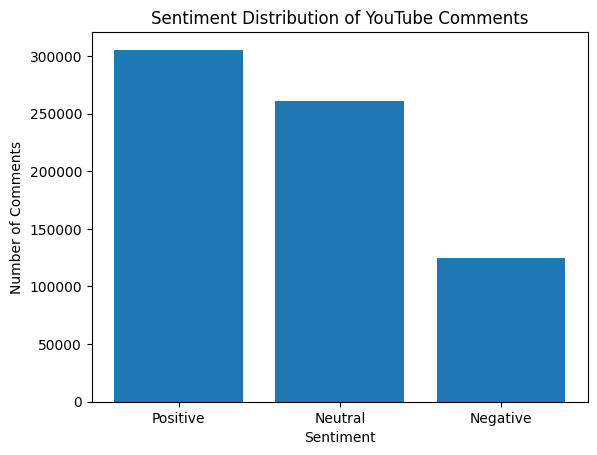

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = US_comments['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of YouTube Comments')
plt.show()

## Let's Contstruct a wordcloud of all the comments to see the most frequent comments.

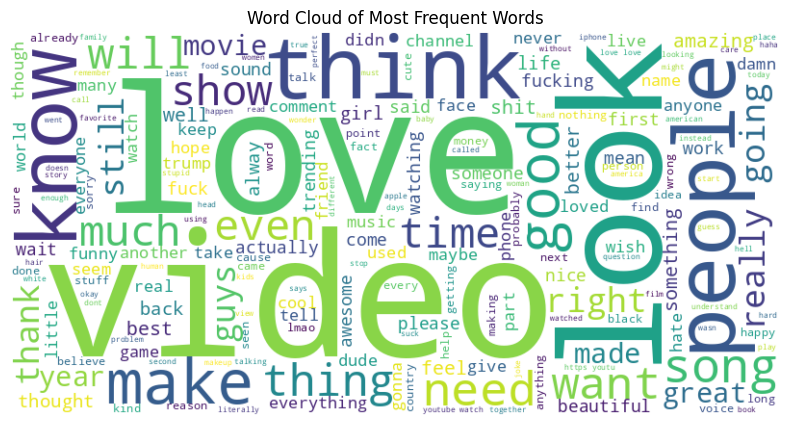

In [ ]:
all_comments = " ".join(US_comments['comment_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

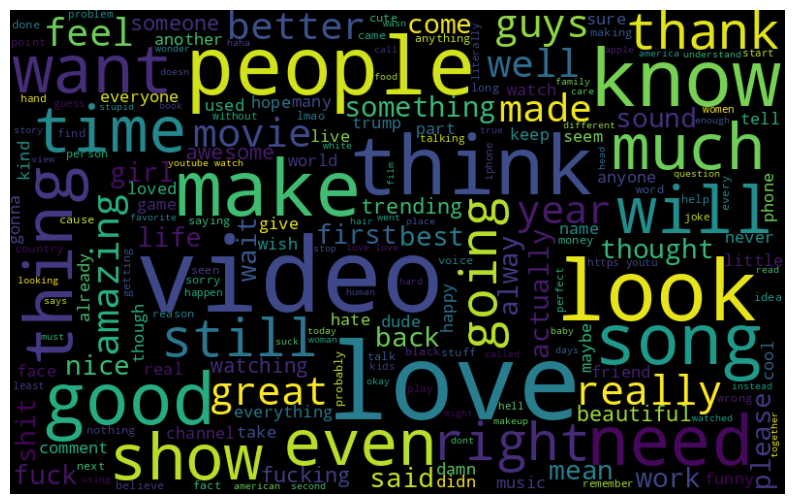

In [ ]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

## Let's Construct a Wordcloud of Positive Comments

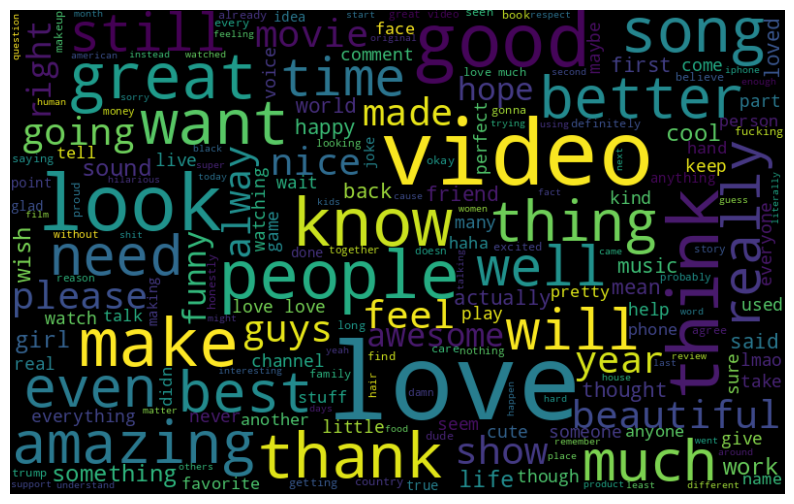

In [ ]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Negative Comments

In [ ]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

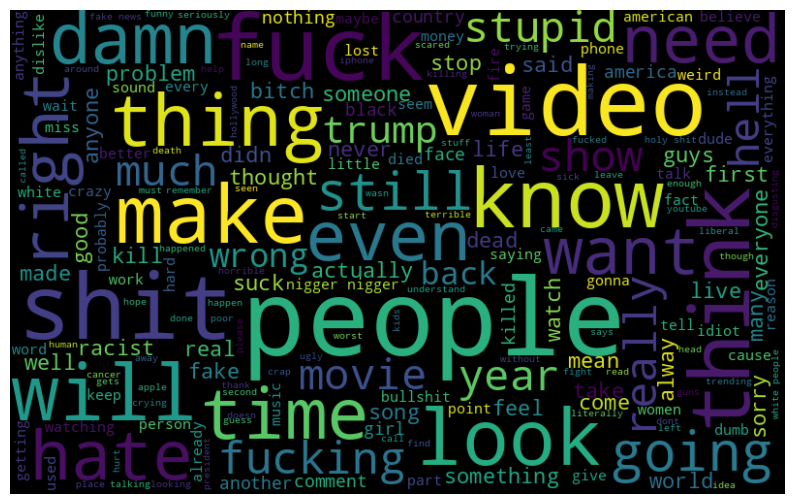

In [ ]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Contsruct a Wordcloud of Neutral Comments.

In [ ]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

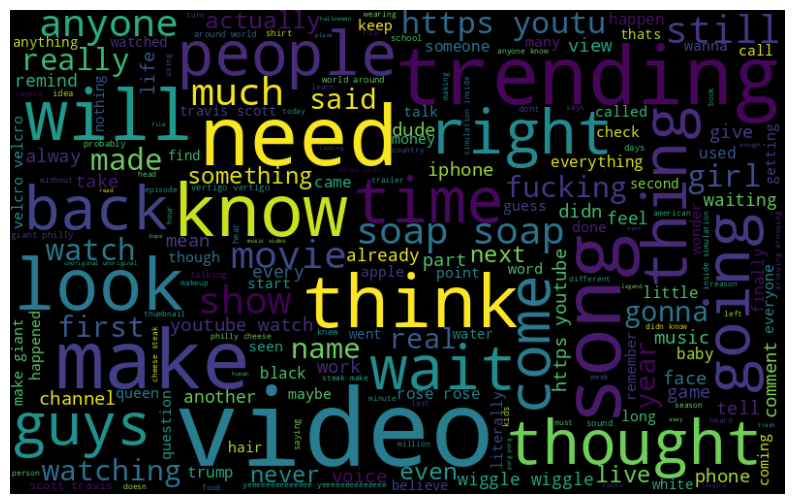

In [ ]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

## Findings & Recommendations: ##

- To Content Creators:
  - Use Sentiment Analysis to help establish a better connection with viewers by making it possible to view and respond to or integrate aggregate sentiment feedback.
  - Use WordClouds to highlight the most common words and phrases and identify major topics of discussion.
  - Use Sentiment Word Clouds to identify the topics generating negativity and positivity. By video this can help creators better understand how content is being received, which videos are most sought after by the viewers, which ones are most enjoyable to make and which subset of potential viewers is most likely to appreciate the more genuine content, etc.
- To Marketers:
  - Building on the idea of identifying subsets of viewers by grouping by positive sentiment and tracing the source of that sentiment, marketers can use sentiment analysis on viewers of thier ads to better identify customers that are most likely to resonate with the message or be most inclined to purchase a product if it were raised to thier awareness.
  - This can be done explicitly by grouping comments by sentiment score and extrapolating characteristics of the subset of people that resonate with your particular service or product (measured by a high sentiment score near positive 1).
  - Wordclouds can be used for marketing to test the brand recognition effectiveness of a marketing campaign or to curate key words that will help inform future marketing efforts.


